In [1]:
import xarray as xr
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=4)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 18.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:60959,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:60970,Total threads: 3
Dashboard: http://127.0.0.1:60976/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:60962,


In [2]:
# Example: Access ERA5 data
path = 'gs://gcp-public-data-arco-era5/ar/1959-2022-6h-1440x721.zarr'

ds = xr.open_dataset(path, engine='zarr').chunk('auto')
ds

<xarray.Dataset> Size: 41TB
Dimensions:                                           (time: 92044,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 13)
Coordinates:
  * time                                              (time) datetime64[ns] 736kB ...
  * latitude                                          (latitude) float32 3kB ...
  * longitude                                         (longitude) float32 6kB ...
  * level                                             (level) int64 104B 50 ....
Data variables: (12/38)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 382GB dask.array<chunksize=(322, 322, 322), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 382GB dask.array<chunksize=(322, 322, 322), meta=np.ndarray>
    10m_wind_speed                                    (time, latitude, longitude) float32 382GB dask.array<chunksize=(322, 322, 322), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 382GB dask.array<chunksize=(322, 322, 322), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    ...                                                ...
    type_of_high_vegetation                           (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 5TB dask.array<chunksize=(137, 13, 137, 137), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 5TB dask.array<chunksize=(137, 13, 137, 137), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 5TB dask.array<chunksize=(137, 13, 137, 137), meta=np.ndarray>
    wind_speed                                        (time, level, latitude, longitude) float32 5TB dask.array<chunksize=(137, 13, 137, 137), meta=np.ndarray>

In [3]:
t2m = ds['2m_temperature']
t2m 

<xarray.DataArray '2m_temperature' (time: 92044, latitude: 721, longitude: 1440)> Size: 382GB
dask.array<xarray-2m_temperature, shape=(92044, 721, 1440), dtype=float32, chunksize=(322, 322, 322), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 736kB 1959-01-01 ... 2021-12-31T18:00:00
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

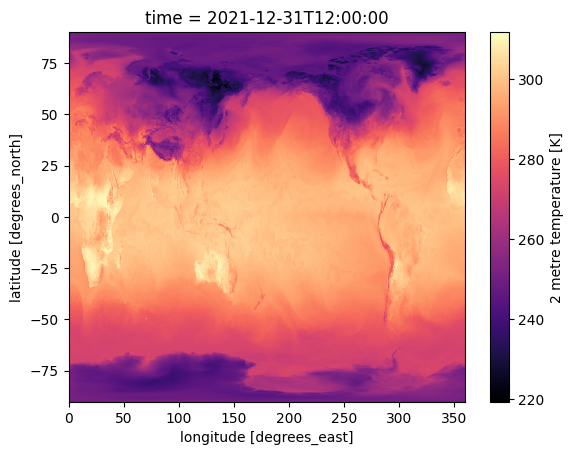

In [4]:
t2m.isel(time=-2).plot(cmap='magma')

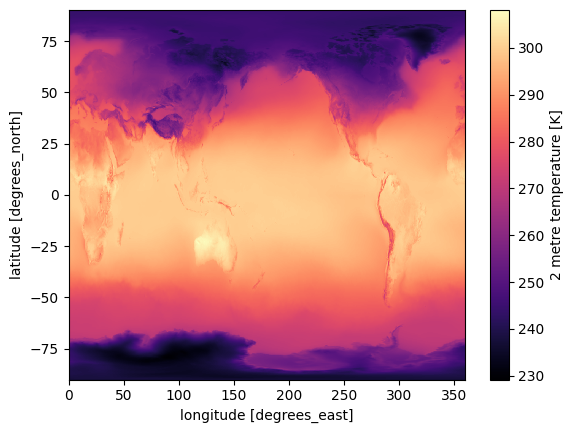

In [5]:
# Quickly swap over to the dask dashboard to watch
t2m.isel(time=slice(0, 322)).mean(dim='time').plot(cmap='magma')

In [6]:
tucson_lat = 32.2540
tucson_lon = 360.0 - 110.9742

year_number = 7
timesteps_per_day = 4
days_per_year = 365
start = year_number * timesteps_per_day * 365
end = (year_number + 1) * timesteps_per_day  * 365

tucson_t2m = t2m.isel(time=slice(start, end)).sel(
    latitude=tucson_lat,
    longitude=tucson_lon,
    method='nearest'
)


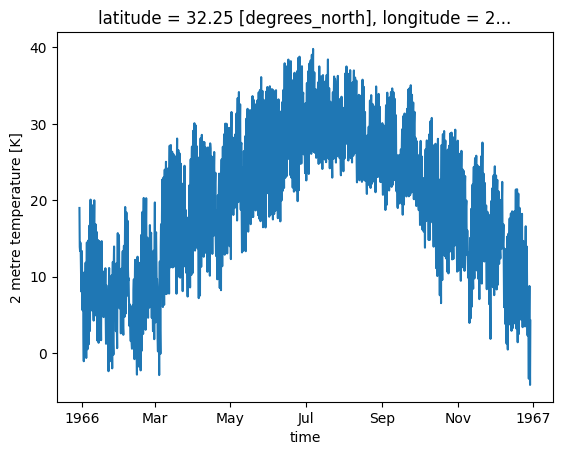

In [7]:
(tucson_t2m - 273).plot()

In [8]:
start_year = 10
number_years = 10
timesteps_per_day = 4
days_per_year = 365
start = start_year * timesteps_per_day * 365
end = (start_year + number_years) * timesteps_per_day  * 365

tucson_t2m = t2m.isel(time=slice(start, end, 7)).sel(
    latitude=tucson_lat,
    longitude=tucson_lon,
    method='nearest'
)

In [9]:
tucson_t2m_climatology = tucson_t2m.groupby(tucson_t2m.time.dt.month).mean()

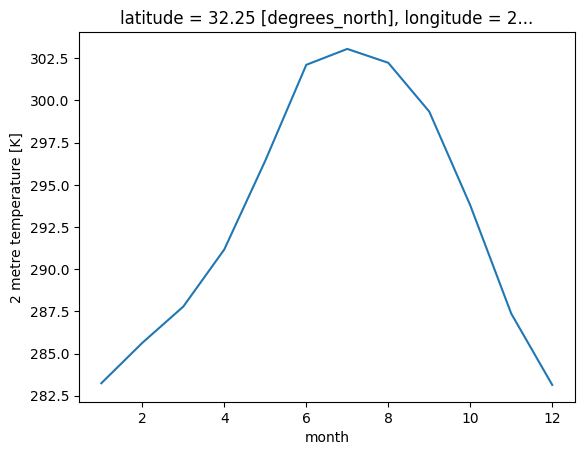

In [10]:
tucson_t2m_climatology.plot()

In [11]:
start = 0
end = -1
step = 77
tucson_t2m = t2m.isel(time=slice(start, end, step)).sel(
    latitude=tucson_lat,
    longitude=tucson_lon,
    method='nearest'
)

tucson_t2m_climatology = tucson_t2m.groupby(tucson_t2m.time.dt.month).mean()


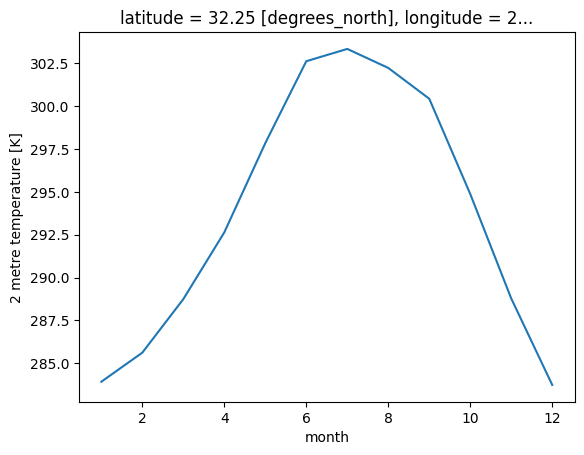

In [12]:

tucson_t2m_climatology.plot()